In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting data

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/time_series_covid19_confirmed_global.csv')

### Covid19 confirmed cases globally until Jan 13, 2022

In [ ]:
df1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,157454,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,20549,20549,21062,21062,21372,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65760,65868,65938,66086,66566,67199,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1309092,1323683,1337523,1352122,1367433,1382272,1398413,1413051,1428428,1443648,1459175,1493237,1508473,1524368,1540478,1555455,1571780,1588335,1604712,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428,1958719,1975444
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,461467,462219,462621,462958,463277,463573,463573,463573,464341,464751,465094,465094,465094,465094,465094,466669,467058,467391,467682,467682,467682,467682,468619,469452,469748,469748,469748,469748,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302,473302,474234
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10025,10034,10043,10047,10047,10056,10063,10069,10072,10075,10081,10086,10092,10097,10101,10102,10103,10103,10105,10109,10111,10115,10118,10123,10125,10126,10126,10127,10130,101

# Data Cleaning

Dropping the columns like *'Province/State'*, *'Lat'*, *'Long'* as they are irrelevant to the data.  And aggregating all data to sum up the number of confirmed cases in every *'Country/Region'* using *groupby*.

In [ ]:
df1 = df1.drop(columns=['Province/State','Lat', 'Long'])
df1 = df1.groupby('Country/Region').sum()
df1

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,12/5/21,12/6/21,12/7/21,12/8/21,12/9/21,12/10/21,12/11/21,12/12/21,12/13/21,12/14/21,12/15/21,12/16/21,12/17/21,12/18/21,12/19/21,12/20/21,12/21/21,12/22/21,12/23/21,12/24/21,12/25/21,12/26/21,12/27/21,12/28/21,12/29/21,12/30/21,12/31/21,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,1/11/22,1/12/22,1/13/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,157454,157499,157508,157542,157585,157603,157611,157633,157648,157660,157665,157725,157734,157745,157787,157797,157816,157841,157878,157887,157895,157951,157967,157998,158037,158056,158084,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394,158471,158511,158602
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,201730,201902,202295,202641,202863,203215,203524,203787,203925,204301,204627,204928,205224,205549,205777,205897,206273,206616,206935,207221,207542,207709,207709,208352,208899,208899,210224,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487,222664,224569,226598
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,211469,211662,211859,212047,212224,212434,212652,212848,213058,213288,213533,213745,214044,214330,214592,214835,215145,215430,215723,216098,216376,216637,216930,217265,217647,218037,218432,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639,223196,223806,224383
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18010,18631,18815,18815,19272,19440,19440,19440,19440,20136,20136,20549,20549,20549,20549,21062,21062,21372,21571,21730,21730,21730,22332,22540,22823,23122,23740,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983,28542,28899,28899
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,65259,65259,65301,65332,65346,65371,65397,65404,65404,65431,65565,65648,65760,65868,65938,66086,66566,67199,68362,70221,71142,71752,71752,76787,78475,79871,81593,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316,91148,91907,92581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,1309092,1323683,1337523,1352122,1367433,1382272,1398413,1413051,1428428,1443648,1459175,1493237,1508473,1524368,1540478,1555455,1571780,1588335,1604712,1620869,1636455,1651673,1666545,1680985,1694874,1714742,1731257,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393,1930428,1958719,1975444
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,461467,462219,462621,462958,463277,463573,463573,463573,464341,464751,465094,465094,465094,465094,465094,466669,467058,467391,467682,467682,467682,467682,468619,469452,469748,469748,469748,469748,469748,469748,471090,471414,471414,471414,471414,471414,472910,473302,473302,474234
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10025,10034,10043,10047,10047,10056,10063,10069,10072,10075,10081,10086,10092,10097,10101,10102,10103,10103,10105,10109,10111,10115,10118,10123,10125,10126,10126,10127,10130,10138,10143,10146,10152,10159,10178,10197,10197,10208,10220,1

# Creating Datetime index

First, transposing the dataframe

In [ ]:
df1=df1.T
df1

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1/9/22,158381,219694,222157,26408,89718,5058,6310844,345855,1045291,1339421,621234,28619,292572,1593700,31841,708291,2231686,35802,25522,2781,677166,297333,229855,22529183,15634,780417,19636,532062,34722,50250,120621,109666,2532885,12454,6185,1829437,116641,5330662,7594,22418,...,7448,285647,1397257,490784,28,24261,3526054,16042,7164906,591667,47443,865,57705,1416650,1483212,50502,17362,17493,30564,2269550,19856,33915,1,96952,743838,9980422,60261705,153762,3883316,785625,14563769,449422,200341,7,447288,1899575,471414,10197,282904,221918
1/10/22,158394,220487,222639,27983,90316,5058,6399196,345981,1139097,1350225,621563,28968,294466,1595931,32228,708931,2286532,36983,25522,2802,686023,302587,232432,22563104,15678,787178,19636,532167,35500,50959,120636,109666,2598598,12454,6556,1833478,116839,5357767,7622,22418,...,7454,286397,1398557,493289,28,24261,3528463,16253,7457300,592128,48355,865,58714,1416650,1546877,50527,17394,17493,30564,2277476,19858,34385,1,97354,744967,10045658,61626123,154578,3885416,788187,14708999,456179,200730,7,447288,1914393,472910,10197,284389,223000
1/11/22,158471,222664,223196,28542,91148,5058,6533635,346224,1223505,1361741,622236,29489,296253,1598389,32795,709622,2307843,38072,25522,2830,697236,304856,232432,22636359,15678,794240,19636,532402,35755,52007,120670,109666,2627864,12650,6558,1837390,117077,5380841,7655,22418,...,7454,287243,1401959,498506,25,24261,3534131,16337,7592242,593072,48813,865,59776,1487291,1571481,50552,17463,17493,30564,2284609,19860,34658,1,97897,749832,10119884,62385927,155443,3890974,790698,14826336,463357,201155,7,447865,1930428,473302,10208,287110,223000
1/12/22,158511,224569,223806,28899,91907,5214,6664717,346811,1398776,1378747,622881,29730,298542,1601305,33311,710632,2347164,38950,26036,2837,711299,307433,232432,22724232,15750,799943,19886,532553,35755,52729,120718,109666,2663633,12650,6558,1842218,117279,5410698,7715,22418,...,7493,288125,1405854,505929,25,24261,3540891,16337,7771367,593725,49096,865,60

The index column is still a *'string'* type. Changing it into *'Datetime'* format using *pd.to_datetime* and *pd.DatetimeIndex*

In [ ]:
df1.index = pd.to_datetime(df1.index, infer_datetime_format=True)
df1

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-09,158381,219694,222157,26408,89718,5058,6310844,345855,1045291,1339421,621234,28619,292572,1593700,31841,708291,2231686,35802,25522,2781,677166,297333,229855,22529183,15634,780417,19636,532062,34722,50250,120621,109666,2532885,12454,6185,1829437,116641,5330662,7594,22418,...,7448,285647,1397257,490784,28,24261,3526054,16042,7164906,591667,47443,865,57705,1416650,1483212,50502,17362,17493,30564,2269550,19856,33915,1,96952,743838,9980422,60261705,153762,3883316,785625,14563769,449422,200341,7,447288,1899575,471414,10197,282904,221918
2022-01-10,158394,220487,222639,27983,90316,5058,6399196,345981,1139097,1350225,621563,28968,294466,1595931,32228,708931,2286532,36983,25522,2802,686023,302587,232432,22563104,15678,787178,19636,532167,35500,50959,120636,109666,2598598,12454,6556,1833478,116839,5357767,7622,22418,...,7454,286397,1398557,493289,28,24261,3528463,16253,7457300,592128,48355,865,58714,1416650,1546877,50527,17394,17493,30564,2277476,19858,34385,1,97354,744967,10045658,61626123,154578,3885416,788187,14708999,456179,200730,7,447288,1914393,472910,10197,284389,223000
2022-01-11,158471,222664,223196,28542,91148,5058,6533635,346224,1223505,1361741,622236,29489,296253,1598389,32795,709622,2307843,38072,25522,2830,697236,304856,232432,22636359,15678,794240,19636,532402,35755,52007,120670,109666,2627864,12650,6558,1837390,117077,5380841,7655,22418,...,7454,287243,1401959,498506,25,24261,3534131,16337,7592242,593072,48813,865,59776,1487291,1571481,50552,17463,17493,30564,2284609,19860,34658,1,97897,749832,10119884,62385927,155443,3890974,790698,14826336,463357,201155,7,447865,1930428,473302,10208,287110,223000
2022-01-12,158511,224569,223806,28899,91907,5214,6664717,346811,1398776,1378747,622881,29730,298542,1601305,33311,710632,2347164,38950,26036,2837,711299,307433,232432,22724232,15750,799943,19886,532553,35755,52729,120718,109666,2663633,12650,6558,1842218,117279,5410698,7715,22418,...,7493,288125,1405854,505929,25,24261,3540891,16337

# Exploring and Visualizing the Data

To know the confirmed number of cases in every country on the *1st* date of every month

In [ ]:
df1[df1.index.day == 1]

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-02-01,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,11891,0,0,0,...,0,16,0,0,0,0,0,0,1,1,0,0,0,1,0,0,10,0,0,19,0,0,0,0,0,0,8,0,0,4,2,0,0,0,0,6,0,0,0,0
2020-03-01,5,0,1,0,0,0,0,1,27,14,3,0,47,0,0,1,2,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,26,0,0,9,79932,0,0,0,...,0,106,0,0,0,0,0,0,84,1,0,0,0,14,27,0,40,0,0,42,0,0,0,0,0,0,32,0,0,21,94,0,0,0,0,16,0,0,0,0
2020-04-01,192,259,847,390,8,7,1054,571,4862,10711,359,21,569,54,34,163,13964,3,13,4,115,459,4,6836,131,422,282,15,2,6,109,233,10527,3,7,3137,82361,1065,0,19,...,2,1000,400,841,0,5,1380,0,104118,146,7,0,10,5320,17768,10,329,0,20,1771,1,36,0,90,423,15679,224317,44,794,814,43789,350,181,0,143,218,134,0,36,8
2020-05-01,2171,782,4154,745,30,25,4532,2148,6778,15531,1854,81,3170,8238,81,14917,49032,18,90,7,1229,1781,23,92202,138,1555,649,151,11,122,122,1832,58549,72,73,18687,83959,7006,1,229,...,136,17101,1403,1434,0,601,5951,45,215216,690,442,0,10,22133,29705,44,429,15,480,2960,24,123,0,116,998,122392,1116002,85,10861,13038,183501,648,2086,0,335,270,353,7,109,40
2020-06-01,15836,1143,9513,765,86,26,17415,9492,7221,16733,5662,102,11871,49534,92,43403,58517,18,243,43,10531,2524,38,531286,141,2519,847,228,63,458,125,6397,93330,1069,790,129020,84154,30493,106,611,...,865,35292,1522,1473,0,2023,34357,994,239638,1643,5026,0,44,39309,30871,123,443,3930,509,3082,24,443,0,117,1084,164769,1816120,457,24562,35192,258983,825,3702,0,1662,328,449,354,1089,203
2020-07-01,31848,2580,14272,855,291,69,67197,26065,8001,17873,18112,104,27414,149258,97,62424,61509,28,1199,77,34227,4606,227,1459494,141,5154,962,303,170,1267,141,12592,106226,3745,866,282043,84816,102009,303,1382,...,1498,44122,1687,1613,0,2924,159333,2021,249659,2054,9500,0,535,68608,31851,293,447,5954,509,3173,24,661,0,130,1175,201098,2694072,893,45924,49069,285279,943,8781,0,6062,355,2758,1190,1632,605
2020-08-01,36796,5396,30950,925,1164,91,196543,38841,17895,21212,32157,599,41190,239860,122,67946,69402,56,1805,102,78793,11876,804,2711992,141,11836,1143,353,395,2480,240,17255,118523,4614,936,357658,87827,306181,386,3200,...,1823,52512,2337,2171,0,3212,503290,2352,288522,2815,11644,0,1760,77379,35412,780,474,7409,509,3312,24,958,0,173,1552,231869,4625558,1176,72609,60760,305562,1278,24783,0,19443,590,12160,1730,6228,3659
2020-09-01,38282,9606,44833,1184,2729,94,428239,43878,25923,27642,36578,2276,52440,314946,176,71962,85487,1050,2145,227,117267,20234,1724,3959158,144,16454,1370,919,445,3970,274,19409,131385,4711,1017,413145,89933,624026,427,3979,...,2028,56852,3989,2924,0,3310,628259,2527,470973,3092,13189,0,4089,84521,42393,2830,488,8583,509,3417,27,1416,0,1797,3963,271705,6068485,3037,126279,70805,339415,1611,42127,0,47756,1044,23281,1962,12381,6559
2020-10-01,39371,13806,51690,2050,5114,101,765002,50850,27109,45686,40309,4123,71374,364987,193,79019,121059,1992,2357,282,135716,27749,3172,4853148,146,20833,2088,14383,510,6126,278,20838,164583,4829,1203,464750,90567,835339,484,5089,...,2238,57784,10938,5865,0,3593,676084,2704,778607,3382,13653,0,4891,93615,53832,4247,515,9769,509,3569,28,1809,0,4570,18413,320070,7280554,8287,218625,95348,462777,2061,57190,0,76029,1095,40322,2039,14802,7850
2020-11-01,41425,21202,58272,4825

To know the confirmed number of cases in each country in the months of *August* since the pandemic started

In [ ]:
df1[df1.index.month == 8]

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-08-01,36796,5396,30950,925,1164,91,196543,38841,17895,21212,32157,599,41190,239860,122,67946,69402,56,1805,102,78793,11876,804,2711992,141,11836,1143,353,395,2480,240,17255,118523,4614,936,357658,87827,306181,386,3200,...,1823,52512,2337,2171,0,3212,503290,2352,288522,2815,11644,0,1760,77379,35412,780,474,7409,509,3312,24,958,0,173,1552,231869,4625558,1176,72609,60760,305562,1278,24783,0,19443,590,12160,1730,6228,3659
2020-08-02,36796,5519,31465,925,1199,91,201919,39050,18318,21304,32443,648,41536,240746,132,68067,69849,57,1805,102,80153,12296,804,2736058,141,11955,1143,353,395,2547,240,17255,118719,4614,936,359731,87985,317651,386,3200,...,1843,52825,2344,2180,0,3220,511485,2429,288522,2823,11738,0,1849,77417,35550,809,475,7451,509,3317,24,961,0,182,1561,232856,4671564,1182,73761,60999,306309,1286,25336,0,20206,621,12297,1734,6347,3921
2020-08-03,36796,5620,31972,937,1280,92,206743,39102,18730,21385,32684,679,41835,242102,132,68166,70314,57,1805,103,81846,12462,804,2756164,141,12159,1150,355,395,2583,240,17255,118945,4614,936,361493,88099,327850,386,3546,...,1848,53051,2354,2181,0,3220,516862,2429,297054,2828,11738,0,1893,77582,35616,847,474,7495,509,3320,24,976,0,182,1565,233851,4716846,1195,74781,61163,307251,1291,26066,0,20754,652,12541,1734,6580,4075
2020-08-04,36833,5750,32504,939,1344,92,213535,39298,19445,21481,32910,715,42132,244020,132,68250,70648,57,1914,105,83361,12856,804,2812447,141,12414,1153,356,395,2631,243,17718,119658,4618,938,362962,88206,334979,388,3546,...,1855,53346,2368,2190,0,3220,521318,2437,302814,2834,11780,0,1981,77916,35746,892,476,7538,509,3321,25,988,0,194,1584,234934,4771821,1203,75880,61352,307926,1300,27047,0,21438,672,12770,1760,6793,4221
2020-08-05,36915,5889,33055,939,1395,92,220682,39586,19890,21566,33103,751,42514,246674,133,68376,71158,86,1936,105,85141,13138,804,2868616,141,12717,1153,357,395,2689,243,17718,120002,4618,939,364723,88328,345714,388,3546,...,1860,54254,2417,2208,0,3227,529877,2437,305767,2839,11780,0,2050,78341,35927,944,476,7583,509,3328,25,1001,0,199,1601,236112,4827705,1213,77169,61606,308832,1309,27793,0,22299,717,13065,1763,7022,4221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,152960,143174,194186,15025,46929,1598,5167733,240261,49935,683219,409745,17940,272148,1486153,4789,476265,1177909,16012,13366,2592,488933,212306,153793,20711339,2380,450144,13754,386202,11818,35079,91369,83425,1494397,11270,4989,1636627,106943,4901163,4055,13533,...,6363,66928,779136,265703,20,17016,2747018,11365,4831809,416961,37699,744,28462,1123413,770765,27436,15954,17096,1367,1139571,15960,20698,0,43999,654798,6311607,38818687,119327,2376571,714396,6697770,384531,153204,4,329736,410366,334472,7711,205704,124236
2021-08-28,153007,144079,194671,15025,47079,1638,5171458,240953,51256,684541,413986,17940,272246,1489589,4881,477901,1177909,16012,13366,2594,489802,212306,153793,20734286,2380,451148,13759,38913

To know the number of confirmed cases from March 01 to August 01 in the year 2020

In [ ]:
df1['2020-03-01':'2020-08-01']

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Sierra Leone,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-03-01,5,0,1,0,0,0,0,1,27,14,3,0,47,0,0,1,2,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,26,0,0,9,79932,0,0,0,...,0,106,0,0,0,0,0,0,84,1,0,0,0,14,27,0,40,0,0,42,0,0,0,0,0,0,32,0,0,21,94,0,0,0,0,16,0,0,0,0
2020-03-02,5,0,3,1,0,0,0,1,30,18,3,0,49,0,0,1,8,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,32,0,0,9,80136,0,0,0,...,0,108,0,0,0,0,0,0,120,1,0,0,0,19,42,0,41,0,0,43,0,0,0,0,0,0,55,0,0,21,134,0,0,0,0,16,0,0,0,0
2020-03-03,5,0,5,1,0,0,1,1,39,21,3,0,49,0,0,1,13,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,37,0,0,10,80261,0,0,0,...,0,110,0,0,0,0,0,0,165,1,0,0,0,32,56,0,42,0,0,43,0,0,0,0,0,0,74,0,1,27,189,0,0,0,0,16,0,0,0,0
2020-03-04,5,0,12,1,0,0,1,1,52,29,3,0,52,0,0,6,23,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,42,0,0,10,80386,0,0,0,...,0,110,0,0,0,0,0,0,222,1,0,0,0,62,90,0,42,0,0,43,0,0,0,0,1,0,107,0,1,27,246,0,0,0,0,16,0,0,0,0
2020-03-05,5,0,12,1,0,0,1,1,55,41,6,0,55,0,0,6,50,0,0,0,0,2,0,4,0,0,0,0,0,0,1,0,46,0,0,13,80537,0,0,0,...,0,117,0,2,0,0,1,0,259,1,0,0,0,87,114,0,44,0,0,47,0,0,0,0,1,0,184,0,1,29,295,0,0,0,0,16,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-28,36454,4997,28615,907,1000,86,173355,37629,15582,20677,30858,447,39921,229185,110,67366,66662,48,1770,99,72327,10766,739,2503681,141,10871,1105,351,378,2354,226,17179,116838,4599,926,349800,86990,267385,354,3200,...,1786,51197,2204,2101,0,3212,459761,2305,280610,2810,11496,0,1510,76215,34609,694,467,7235,509,3297,24,896,0,153,1468,227982,4361618,1135,68030,59546,302261,1218,21699,0,16571,446,10938,1703,5002,2817
2020-07-29,36557,5105,29229,918,1078,91,178996,37937,16298,20850,31221,484,40311,232194,110,67518,67335,48,1805,99,73534,11127,804,2559132,141,11155,1105,351,387,2373,226,17255,117325,4605,926,351575,87213,276055,378,3200,...,1803,51531,2245,2115,0,3212,471123,2322,282641,2810,11579,0,1607,76516,34802,717,467,7276,509,3298,24,896,0,156,1488,228924,4429993,1140,69078,59921,303063,1237,22585,0,17158,459,11284,1711,5249,2879
2020-07-30,36628,5197,29831,922,1109,91,185373,38196,16903,20955,31560,508,40755,234889,110,67665,68006,48,1805,101,75234,11444,804,2617187,141,11420,1106,353,387,2418,234,17255,117740,4605,935,353536,87489,286020,378,3200,...,1818,51809,2265,2139,0,3212,482169,2322,285430,2814,11579,0,1607,76818,35022,738,467,7320,509,3304,24,908,0,164,1514,229891,4497959,1147,70300,60223,303910,1243,23271,0,17859,509,11548,1726,5555,3092
2020-07-31,36628,5276,30394,925,1148,91,191302,38550,17280,21130,31878,574,40982,237661,110,67808,68751,48,1805,101,76789,11876,804,2670451,141,11690,1106,353,387,2451,239,17255,118297,4608,936,355667,87655,295508,378,3200,...,1823,52205,2292,2156,0,3212,493183,2322,288522,2815,11579,0,1650,77076,35232,757,467,7366,509,3310,24,941,0,169,1535,230873,4566426,1154,71404,60506,304793,1264,24009,0,18574,558,11837,1728,5963,3169


Ranking the countries according to the total number of confirmed Covid19 cases

In [ ]:
df1=df1.sort_values(by=df1.index.values[-1], axis=1, ascending=False)
df1

Country/Region,US,India,Brazil,United Kingdom,France,Russia,Turkey,Italy,Spain,Germany,Argentina,Iran,Colombia,Indonesia,Poland,Mexico,Ukraine,South Africa,Netherlands,Philippines,Malaysia,Canada,Czechia,Peru,Belgium,Thailand,Iraq,Vietnam,Romania,Chile,Japan,Portugal,Israel,Switzerland,Greece,Bangladesh,Sweden,Australia,Slovakia,Serbia,...,Nicaragua,Tajikistan,Saint Lucia,South Sudan,Brunei,New Zealand,Equatorial Guinea,Djibouti,Central African Republic,Gambia,Yemen,San Marino,Grenada,Eritrea,Niger,Comoros,Dominica,Sierra Leone,Liberia,Liechtenstein,Guinea-Bissau,Saint Vincent and the Grenadines,Chad,Monaco,Sao Tome and Principe,Antigua and Barbuda,Saint Kitts and Nevis,Bhutan,Summer Olympics 2020,Diamond Princess,Holy See,Solomon Islands,MS Zaandam,Palau,Vanuatu,Marshall Islands,Samoa,Kiribati,Micronesia,Tonga
2020-01-22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,2,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,2,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,2,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,6,0,2,0,0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,5,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,8,0,2,0,0,4,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-09,60261705,35707727,22529183,14563769,12218022,10470006,9980422,7436939,7164906,7553743,6310844,6206405,5330662,4266195,4213197,4125388,3883316,3526054,3410288,2965447,2786219,2532885,2528146,2358685,2231686,2269550,2097540,1899575,1844537,1829437,1764280,1639846,1503082,1483212,1507616,1593700,1416650,1045291,1397257,1350595,...,17526,17493,14874,16042,15634,14735,14401,14177,12454,10792,10197,9095,7699,8335,8006,7594,7299,7448,6851,6658,6694,6247,6185,5593,4892,5058,4145,2781,865,712,27,28,9,8,7,7,3,2,1,1
2022-01-10,61626123,35875790,22563104,14708999,12311963,10485705,10045658,7554344,7457300,7570361,6399196,6208337,5357767,4266649,4220984,4125388,3885416,3528463,3439340,2998530,2788860,2598598,2530917,2375813,2286532,2277476,2098908,1914393,1848641,1833478,1770545,1660058,1557597,1546877,1535382,1595931,1416650,1139097,1398557,1359544,...,17526,17493,15101,16253,15678,14758,14871,14317,12454,10792,10197,9518,7699,8419,8076,7622,7394,7454,6851,6716,6713,6247,6556,6087,4916,5058,4216,2802,865,712,27,28,9,8,7,7,3,2,1,1
2022-01-11,62385927,35875790,22636359,14826336,12680780,10503101,10119884,7774863,7592242,7690632,6533635,6210298,5380841,4267451,4232386,4170066,3890974,3534131,3470083,3026473,2792035,2627864,2538298,2412577,2307843,2284609,2100518,1930428,1857502,1837390,1776780,1693398,1589099,1571481,1568215,1598389,1487291,1223505,1401959,1359544,...,17563,17493,15372,16337,15678,14850,14871,14415,12650,11122,10208,9518,8601,8559,8076,7655,7562,7454,7054,6824,6794,6562,6558,6165,5052,5058,4339,2830,865,712,27,25,9,8,7,7,3,2,1,1
2022-01-12,63285605,36317927,22724232,14958196,13042665,10520898,10197606,7971068,7771367,7776864,6664717,6212387,5410698,4268097,4248559,4214253,3898240,3540891,3504451,3058634,2795233,2663633,2562235,2440349,2347164,2300457,2102555,1958719,1866102,1842218,1789824,1734343,1669622,1604371,1592460,1601305,1509230,1398776,1405854,1386114,...,17563,17493,15937,16337,15750,14889,14871,14541,12650,11122,1022

Picking the top 10 countries with the most number of confirmed Covid19 cases

In [ ]:
df1 = df1.iloc[:,0:10]
df1

Country/Region,US,India,Brazil,United Kingdom,France,Russia,Turkey,Italy,Spain,Germany
2020-01-22,1,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,0,2,0,0,0,0,0
2020-01-25,2,0,0,0,3,0,0,0,0,0
2020-01-26,5,0,0,0,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-01-09,60261705,35707727,22529183,14563769,12218022,10470006,9980422,7436939,7164906,7553743
2022-01-10,61626123,35875790,22563104,14708999,12311963,10485705,10045658,7554344,7457300,7570361
2022-01-11,62385927,35875790,22636359,14826336,12680780,10503101,10119884,7774863,7592242,7690632
2022-01-12,63285605,36317927,22724232,14958196,13042665,10520898,10197606,7971068,7771367,7776864


Plotting the top 10 countries with the highest number of confirmed cases

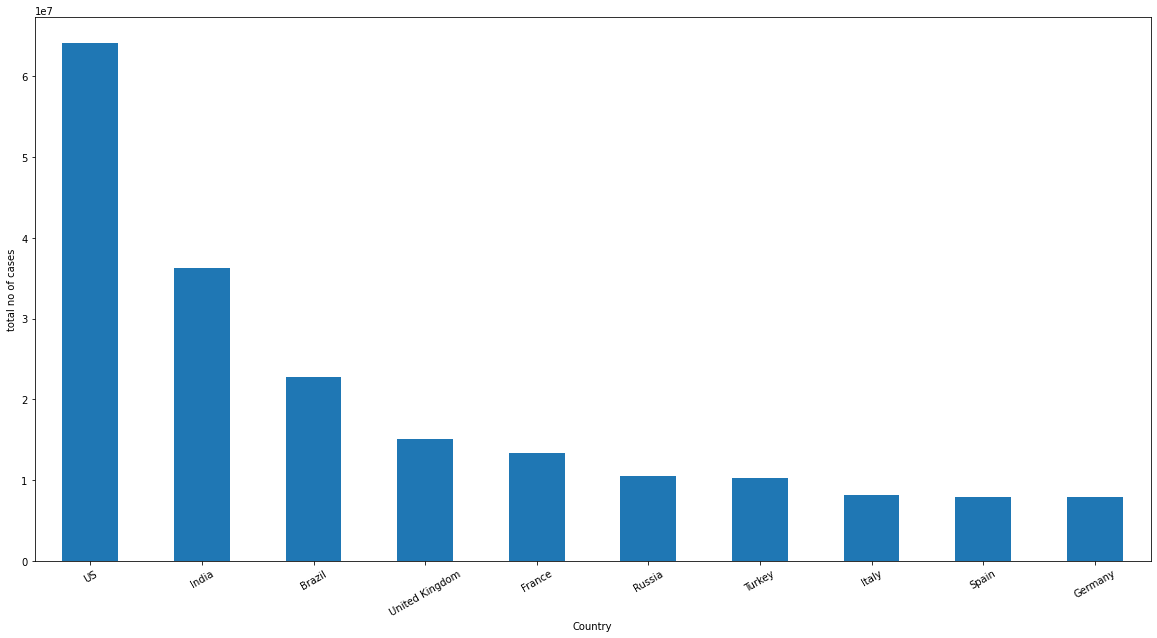

In [ ]:
df1.iloc[-1].plot.bar(figsize=(20,10), rot=30)
plt.xlabel("Country")
plt.ylabel("total no of cases")
plt.show()

#### Resampling the DataFrame

Mean resampling the dataframe in a monthly time interval

In [ ]:
df1.resample('M').mean()

Country/Region,US,India,Brazil,United Kingdom,France,Russia,Turkey,Italy,Spain,Germany
2020-01-31,4.100000e+00,2.000000e-01,0.000000e+00,2.000000e-01,3.000000e+00,2.000000e-01,0.000000e+00,2.000000e-01,0.000000e+00,1.800000e+00
2020-02-29,1.386207e+01,2.896552e+00,1.724138e-01,2.089655e+01,1.606897e+01,2.000000e+00,0.000000e+00,1.367586e+02,5.206897e+00,1.934483e+01
2020-03-31,3.617597e+04,3.307097e+02,1.197645e+03,9.135452e+03,1.315916e+04,3.943226e+02,1.896000e+03,3.902490e+04,2.395310e+04,1.897352e+04
2020-04-30,6.650773e+05,1.492023e+04,3.495020e+04,1.109448e+05,1.152102e+05,3.764790e+04,6.994023e+04,1.642841e+05,1.745592e+05,1.314308e+05
2020-05-31,1.468791e+06,9.962884e+04,2.577018e+05,2.263455e+05,1.807156e+05,2.663578e+05,1.458616e+05,2.230601e+05,2.291178e+05,1.750908e+05
2020-06-30,2.164134e+06,3.650571e+05,9.455437e+05,2.737786e+05,1.974167e+05,5.365860e+05,1.809857e+05,2.371744e+05,2.443731e+05,1.890254e+05
2020-07-31,3.594194e+06,1.059022e+06,2.027724e+06,2.942065e+05,2.141999e+05,7.494529e+05,2.165404e+05,2.438950e+05,2.623965e+05,2.020993e+05
2020-08-31,5.367415e+06,2.668864e+06,3.326451e+06,3.204438e+05,2.629094e+05,9.196143e+05,2.498349e+05,2.554717e+05,3.599691e+05,2.266043e+05
2020-09-30,6.639994e+06,5.057839e+06,4.408664e+06,3.854835e+05,4.533403e+05,1.076305e+06,2.954999e+05,2.916454e+05,6.105420e+05,2.674507e+05
2020-10-31,8.111386e+06,7.375542e+06,5.199624e+06,7.097603e+05,9.281821e+05,1.372566e+06,3.453987e+05,4.284263e+05,9.514417e+05,3.759046e+05


Plotting the resampled dataframe

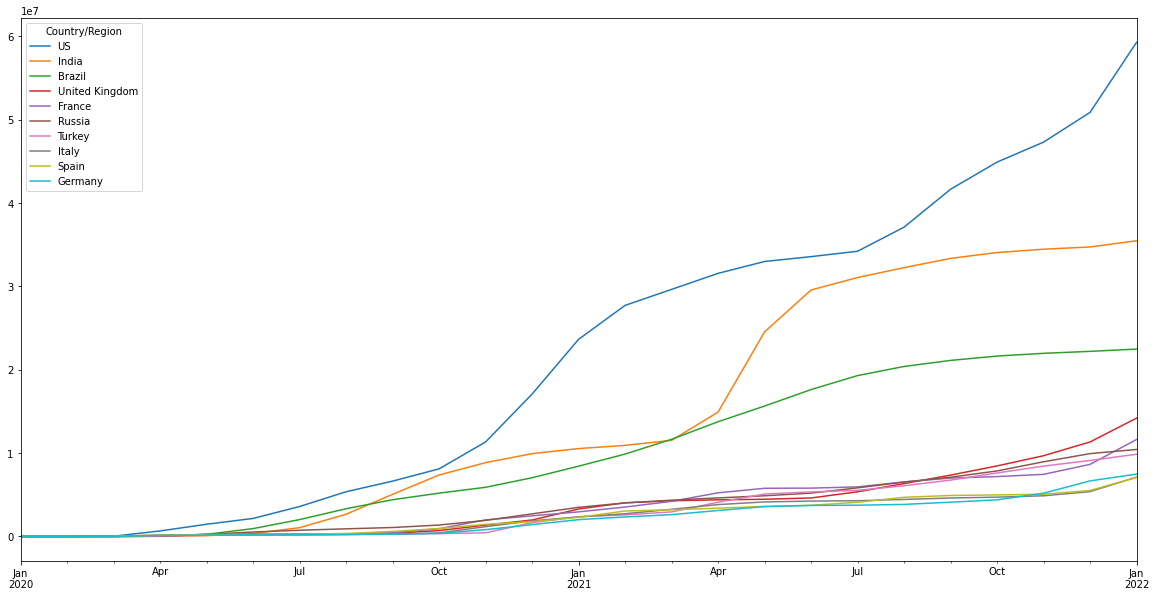

In [ ]:
df1.resample('M').mean().plot(figsize=(20,10))

Finding *percentage change* in the number of confirmed cases in the top 10 countries in a monthly time interval

In [ ]:
df1.resample('M').mean().pct_change()

Country/Region,US,India,Brazil,United Kingdom,France,Russia,Turkey,Italy,Spain,Germany
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,2.380992,13.482759,inf,103.482759,4.356322,9.000000,NaN,682.793103,inf,9.747126
2020-03-31,2608.709116,113.173579,6945.341935,436.175077,817.917763,196.161290,inf,284.356075,4599.263619,979.805647
2020-04-30,17.384505,44.115805,28.182433,11.144424,7.755130,94.474877,35.888309,3.209726,6.287543,5.927068
2020-05-31,1.208452,5.677432,6.373401,1.040163,0.568573,6.074972,1.085518,0.357770,0.312551,0.332190
2020-06-30,0.473411,2.664171,2.669138,0.209561,0.092417,1.014530,0.240804,0.063276,0.066582,0.079585
2020-07-31,0.660800,1.900976,1.144505,0.074615,0.085014,0.396706,0.196451,0.028336,0.073754,0.069165
2020-08-31,0.493357,1.520122,0.640485,0.089180,0.227402,0.227047,0.153756,0.047466,0.371852,0.121252
2020-09-30,0.237093,0.895128,0.325336,0.202968,0.724321,0.170387,0.182781,0.141596,0.696095,0.180254
2020-10-31,0.221595,0.458240,0.179410,0.841221,1.047429,0.275258,0.168863,0.468998,0.558356,0.405510


Plotting the percentage change. The first row simply contains *Nan* so it is ignored

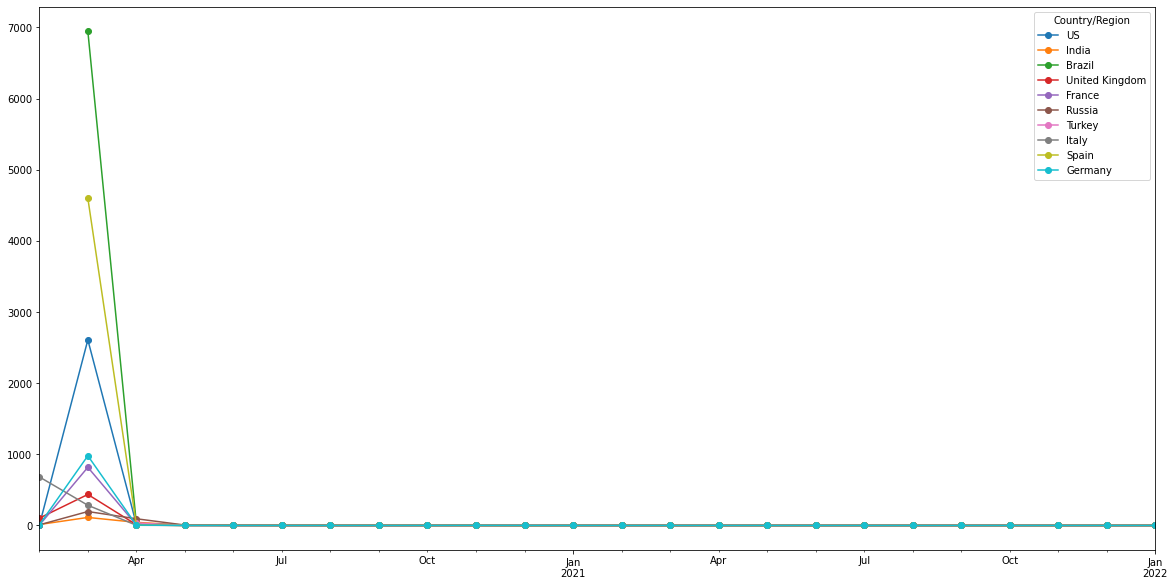

In [ ]:
df1.resample('M').mean().pct_change().iloc[1:].plot(marker="o",figsize=(20,10))

# Analysing Covid19 data for United States 

Creating a new column for the total number of confirmed cases in the US

In [ ]:
df_US = pd.DataFrame(index=df1.index, data=df1["US"].values, columns=["total cases in US"])
df_US

,total cases in US
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2022-01-09,60261705
2022-01-10,61626123
2022-01-11,62385927
2022-01-12,63285605


Plotting the total number of confirmed cases in the US

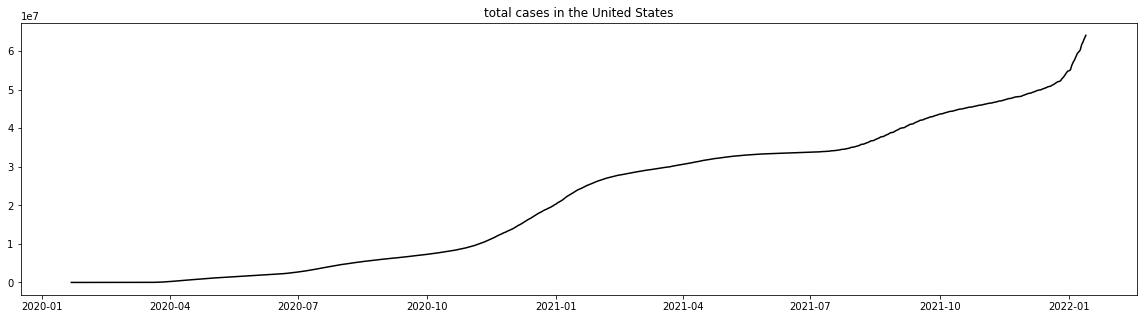

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_US.index, df_US["total cases in US"].values, color="black")
plt.title("total cases in the United States")
plt.show()

# Covid19 timeseries forecasting 

Preparing the training and testing data. Using the last 12 days as test data in this case

In [ ]:
size = 12
train = df_US[:-size]
test = df_US[-size:]
print(f'Traning data: {len(train)} days \nTest data: {len(test)} days')

Traning data: 711 days 
Test data: 12 days


Scaling or normalizing the data using sklearn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

Generating training and test data in sequences using TimeseriesGerenator

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
seq_size = 5 #number of steps
n_features = 1 #number of features

train_generator = TimeseriesGenerator(train_scaled, train_scaled, length=seq_size, batch_size=1)
print(f"Original training data = {len(train)} days")
print(f"Actual training data = {len(train_generator)} days")

Original training data = 711 days
Actual training data = 706 days


In [ ]:
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=seq_size, batch_size=1)
print(f"Original testing data = {len(test_scaled)} days")
print(f"Actual testing data = {len(test_generator)} days")

Original testing data = 12 days
Actual testing data = 7 days


Building the LSTM model for forecasting

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Activation

model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 5, 128)            131584    
                                                                 
 lstm_2 (LSTM)               (None, 5, 128)            131584    
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 383,361
Trainable params: 383,361
Non-trai

Training the model

In [ ]:
history = model.fit(train_generator, 
                    validation_data=test_generator, 
                    epochs=100, steps_per_epoch=10)

Epoch 1/100
10/10 [==============================] - 5s 86ms/step - loss: 0.1016 - mse: 0.1016 - val_loss: 1.1174 - val_mse: 1.1174
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 0.1844 - mse: 0.1844 - val_loss: 0.9048 - val_mse: 0.9048
Epoch 3/100
10/10 [==============================] - 0s 20ms/step - loss: 0.1075 - mse: 0.1075 - val_loss: 0.5239 - val_mse: 0.5239
Epoch 4/100
10/10 [==============================] - 0s 20ms/step - loss: 0.0671 - mse: 0.0671 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 5/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0516 - mse: 0.0516 - val_loss: 0.1829 - val_mse: 0.1829
Epoch 6/100
10/10 [==============================] - 0s 21ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0148 - val_mse: 0.0148
Epoch 7/100
10/10 [==============================] - 0s 22ms/step - loss: 0.0231 - mse: 0.0231 - val_loss: 0.1150 - val_mse: 0.1150
Epoch 8/100
10/10 [==============================] - 0s 20ms/step - loss: 0.

Plotting the training and validation loss for each epoch

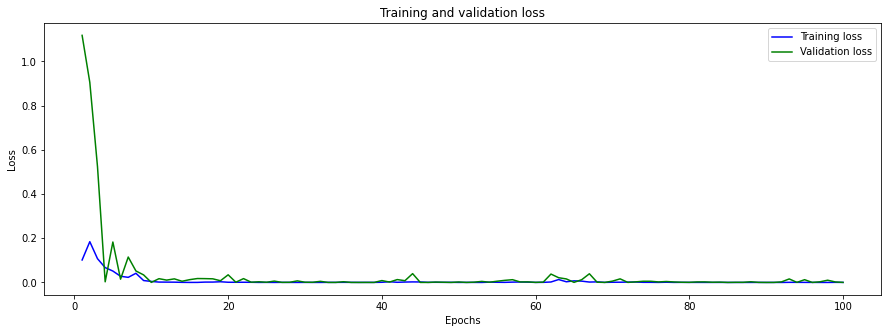

In [ ]:
plt.figure(figsize=(15,5))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Making the prediction

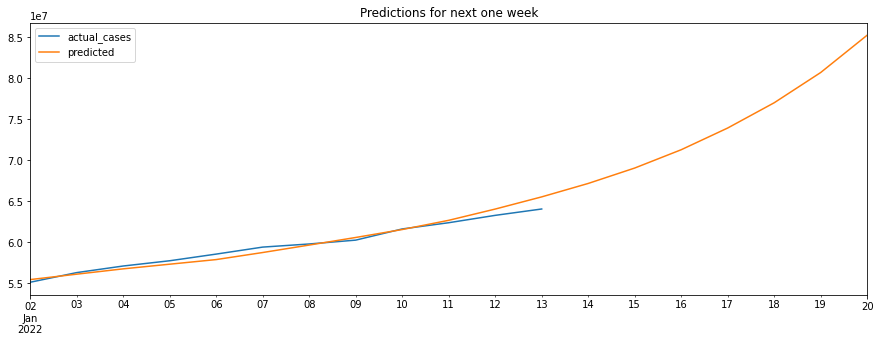

In [ ]:
prediction = [] #Initializing an empty list for the predictions

current_batch = train_scaled[-seq_size:] #Final data points in train 
current_batch = current_batch.reshape(1, seq_size, n_features) #Reshape

future = 7 #predicting for next one week
for i in range(len(test) + future):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

#Inverse transforming to before scaling in order to get the actual numbers
rescaled_prediction = scaler.inverse_transform(prediction)

time_series_array = test.index  #Getting the dates of the test data

#Adding the dates for the next one week forecast period
for j in range(0, future):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))

#Creating a dataframe to capture the forecast data
df_forecast = pd.DataFrame(columns=["actual_cases","predicted"], index=time_series_array)

df_forecast.loc[:,"predicted"] = rescaled_prediction[:,0]
df_forecast.loc[:,"actual_cases"] = test["total cases in US"]

#Plotting the predictions
df_forecast.plot(title="Predictions for next one week", figsize=(15,5))
plt.show()